# **Uber pickups data analysis**
In this notebook, we are going to analyse Uber pickups in New York City from April to September 2014. The dataset we have, contains 4.5 million records of pickups. We will do a simple analysis by creating plots to answer few questions given below.

#### Objectives:
In order to make this analysis fruitful, we will raise some simple questions and then we'll find their answer.
- To analyse the trends along time
- Week days which have more pickups
- Hours which are busy enough
- Impact of holidays on pickups
- Some cross analysis etc.

The dataset is taken from [kaggle](https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city).

#### **Importing libraries**

In [1]:
# libraries for data manipulation and exploration
import pandas as pd
import numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to use monokai theme with graphs
'''
   Before using the following two lines make sure you have
   installed jupyterthemes
'''
from jupyterthemes import jtplot 
jtplot.style(context='notebook', theme='monokai', grid=False, ticks=True)
%matplotlib inline

#### **Reading data**

In [2]:
# we have dataset of six months of year 2014
# april, may, june, july, august and september
apr_df = pd.read_csv('uber-raw-data-apr14.csv')
may_df = pd.read_csv('uber-raw-data-may14.csv')
jun_df = pd.read_csv('uber-raw-data-jun14.csv')
jul_df = pd.read_csv('uber-raw-data-jul14.csv')
aug_df = pd.read_csv('uber-raw-data-aug14.csv')
sep_df = pd.read_csv('uber-raw-data-sep14.csv')

# concatenating all dataset into one
data = pd.concat([apr_df, may_df, jun_df, jul_df, aug_df, sep_df],
                axis=0, ignore_index=True)

# displaying first five rows
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
# checking if there are null values or not
print('Null values in each column :')
print(data.isnull().sum())
print('\n')
data.info()

Null values in each column :
Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


### **Description of data**
There are six files of raw data on Uber pickups in New York City from April to September 2014. The files are separated by month and each has the following columns:

- `Date/Time` : The date and time of the Uber pickup
- `Lat` : The latitude of the Uber pickup
- `Lon` : The longitude of the Uber pickup
- `Base` : The TLC base company code affiliated with the Uber pickup

We have merged all the files into a single file, and it doesn't have null values.

In [4]:
# renaming the date column
data.rename({'Date/Time':'Date'}, axis=1, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])

# let's make some more features with the existing features
data['Month'] = data['Date'].dt.month_name().str[:3] 
data['Day'] = data['Date'].dt.day_name().str[:3]
data['Hour'] = data['Date'].dt.hour
data['Nday'] = data['Date'].dt.day
data['Date'] = data['Date'].dt.date
data.head()

,Date,Lat,Lon,Base,Month,Day,Hour,Nday
0,2014-04-01,40.7690,-73.9549,B02512,Apr,Tue,0,1
1,2014-04-01,40.7267,-74.0345,B02512,Apr,Tue,0,1
2,2014-04-01,40.7316,-73.9873,B02512,Apr,Tue,0,1
3,2014-04-01,40.7588,-73.9776,B02512,Apr,Tue,0,1
4,2014-04-01,40.7594,-73.9722,B02512,Apr,Tue,0,1


### **Analysis**

#### **-  Total and average pickups during the hour of days**
Here, I am going to count down the total number of rides/pickups during particular hours of day for the six months (Apr - Sep). This would help us to know the busy hours of the days.

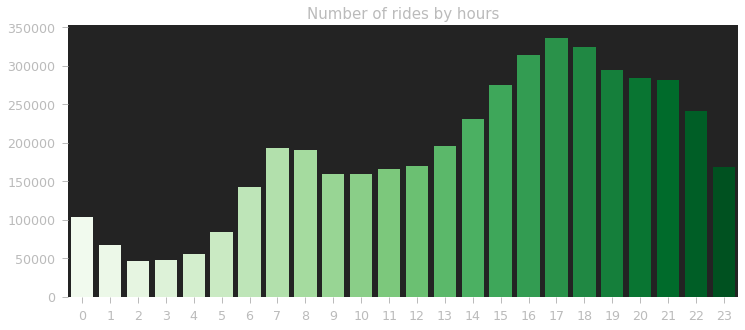

In [5]:
# figure of width = 12 unit, and height = 5
plt.figure(figsize=(12,5))

# creating bar plot to show the count of rides by hours of day
sns.countplot(x='Hour',
              data=data,
              palette='Greens',
              saturation=1)

# removing the frame around graph
sns.despine(bottom=True, left=True)

# removing x and y label
plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of rides by hours',
          fontsize=15);

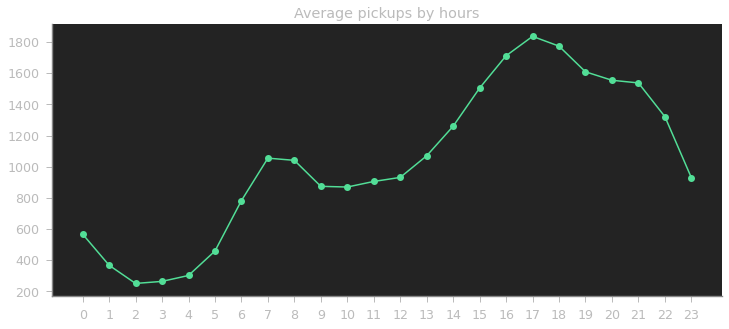

In [6]:
# grouping data on the basis of date and hour
avg_nday = data.groupby(['Date', 'Hour'])['Hour'].count()
avg_nday = avg_nday.groupby('Hour').agg([np.mean])
plt.figure(figsize=(12,5))
plt.plot(avg_nday,
         c='#52de97',
         marker='o')
plt.title('Average pickups by hours')
plt.xticks(range(0,24))
sns.despine()

There is a high rush from afternoon to evening. This says that most of the rides were taken after 10 A.M.. Because people use to go anywhere at this time whether it is trip, college, office, school etc.

Most of the works are done during afternoon to evening and people visit different places at this time so this can be the reason for large number of pickups. Rides are less between 0 - 7 as compared to other hours because people sleep at this time.

#### **- Total and average pickups by weekdays**

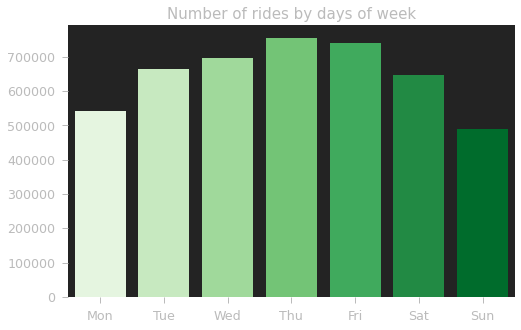

In [7]:
# defining size of figure
plt.figure(figsize=(8,5))

# making bar plot to show counting of rides during days of week
sns.countplot(x='Day',
              data=data,
              palette='Greens',
              saturation=1,
              order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

# removing frame around the graph
sns.despine(bottom=True, left=True)
# plt.xticks(color='black')
# plt.yticks(color='black')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of rides by days of week',
          fontsize=15);

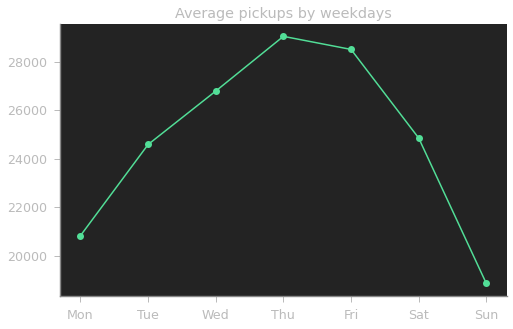

In [8]:
# grouping data by date and week day
avg_day = data.groupby(['Date', 'Day'])['Day'].count()

# calculating average pickups for week days
avg_day = avg_day.groupby('Day').agg([np.mean])
plt.figure(figsize=(8,5))
plt.plot(avg_day.iloc[[1, 5, 6, 4, 0, 2, 3]],
         c='#52de97',
         marker='o')
plt.title('Average pickups by weekdays')
sns.despine();

Rides on sunday and monday are less as compare to other days. Sunday has very less rides, it may be due to weekend or most places like school, college and offices are closed on sunday and most of the people stay at home. 

Between tuesday and saturday, there are so many rides because these are working days.

#### **- Growth in rides by months**

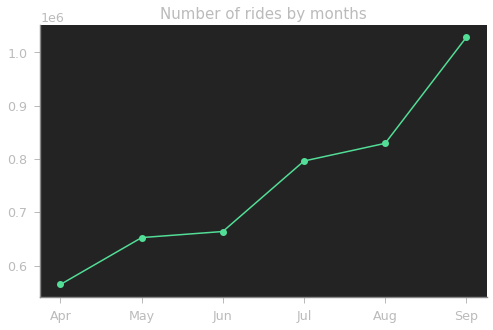

In [9]:
months = data.Month.value_counts().sort_values()
plt.figure(figsize=(8,5))

# making a line chart to show the growth in rides by months
plt.plot(months.index, months.values,
         marker='o',
         c='#52de97')

# removing frame around the graph
sns.despine()
plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of rides by months',
          fontsize=15);

We can see positive growth in rides during the six months. At the end of september 2014, rides increased by more than 1.5%. This shows that people started using uber cabs for transportation at a large scale, also drivers started using uber.

#### **- Rides by months and weekdays**

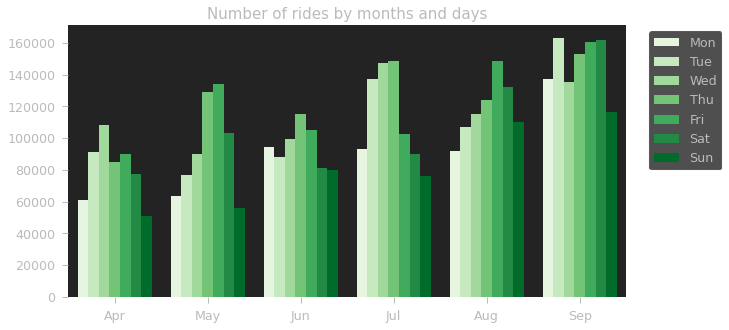

In [10]:
plt.figure(figsize=(10,5))

# making bar graph to show the frequency of rides by months and days
sns.countplot(x='Month',
              data=data, 
              palette='Greens',
              saturation=1,
              hue='Day',
              hue_order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

# removing the frame around graph
sns.despine(bottom=True, left=True)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of rides by months and days',
          fontsize=15)
plt.legend(bbox_to_anchor= (1.03, 1) );

As the time is increasing pickups are increasing also, september has high rush and the overall demand for rides has increased. 

#### **- Cross analysis of months and days**

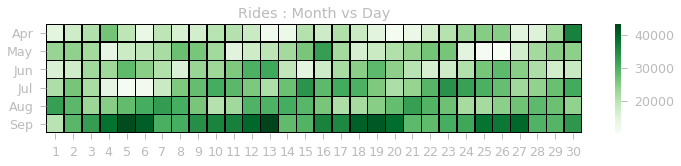

In [11]:
# grouping the data on the basis of month and day of month
# to show number of rides per day in each month
grouped_month_day = data.groupby(['Month', 'Nday'])['Nday'].count().unstack()

# creating heatmap using the grouped data
plt.figure(figsize=(12,2))
sns.heatmap(grouped_month_day.iloc[[0,4,3,2,1,5], :30],
            cmap='Greens',
            linewidths=0.5,
            linecolor='black')

# rotating y axis ticks
plt.yticks(rotation=0)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Rides : Month vs Day');

In april the pickups are less, and we can see a seasonality just because of working days. But in september the rides are in demand means there are more pickups for both working and non-working days.

#### **- Cross analysis of weekdays and hours**

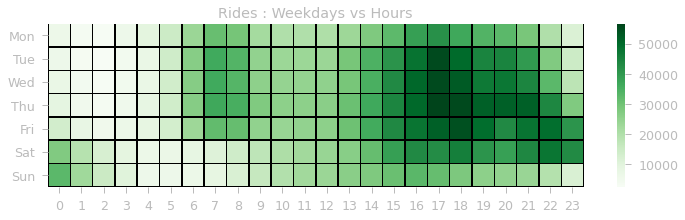

In [12]:
# grouping the data on the basis of days and hours
grouped_day_hour = data.groupby(['Day','Hour'])['Hour'].count().unstack()
plt.figure(figsize=(12,3))
sns.heatmap(grouped_day_hour.iloc[[1,5,6,4,0,2,3]],
            cmap='Greens',
            linewidths=0.5,
            linecolor='black')

# rotating y axis ticks
plt.yticks(rotation=0)

# removing x and y label
plt.xlabel(None)
plt.ylabel(None)
plt.title('Rides : Weekdays vs Hours');

As we can see more pickups are there after 13:00, because this is the usual time when people visit place like malls, hospitals etc. Also we can observe the hours 7 - 8 have more pickups, may be students are taking the rides during these hours between Monday to Friday.

Also, pickups are higher in late night on Friday and Saturday, because the next they have weekends and it's a common thing that people enjoy their weekends till late night. Again, sunday has very less rides as compare to other days followed by Monday.

#### **- Impact of holidays**

In [13]:
import holidays
holiday_dict = {}
# showing the holidays between the given six months
for d in holidays.UnitedStates(years=2014).items():
    if d[0].month in (4,5,6,7,8,9):
        holiday_dict[d[0]] = d[1]
holiday_dict        

{datetime.date(2014, 5, 26): 'Memorial Day',
 datetime.date(2014, 7, 4): 'Independence Day',
 datetime.date(2014, 9, 1): 'Labor Day'}

Only following holidays are there during these six months in 2014:
- **Memorial day** : (May 26)
- **Independence day** : (July 4) 
- **Labor Day** : (September 1)

Now, we will draw graph for each day for the 3 months containing holiday and point out the holiday in each of the graph.

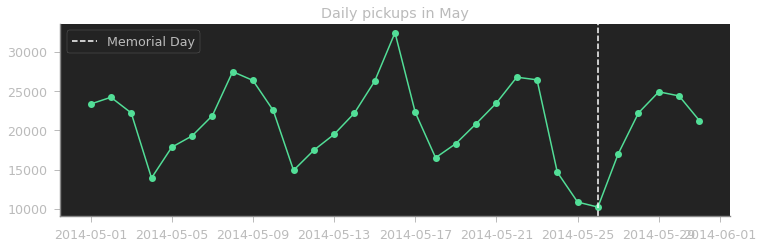

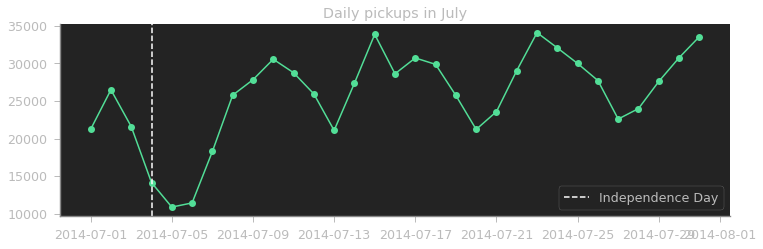

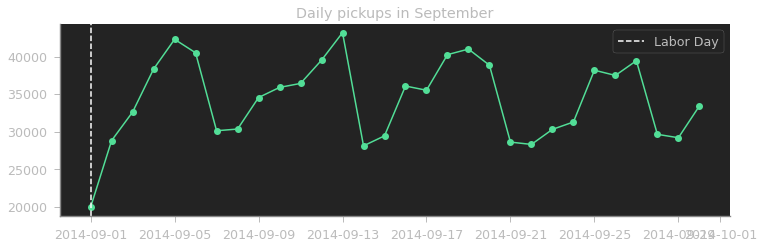

In [14]:
lst = []
for key in holiday_dict.keys():
    lst.append(key)  
holiday_months = ['May','Jul','Sep'] 
months_name = ['May', 'July', 'September']

# ploting line charts of the months containing holidays
for i, month in enumerate(holiday_months):
    # defining size of plots
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(3, 1, i+1)
    df = data[data.Month == month].groupby('Date')['Date'].count()
    ax.plot(df, color='#52de97', marker='o')
    title = 'Daily pickups in ' + months_name[i]
    plt.title(title)
    plt.axvline(lst[i], label=holiday_dict[lst[i]], color='white', linestyle='--')   
    plt.legend()
    sns.despine()

All the graphs have the same conclusion, that pickups are very less on holidays. In the month of May, there was a holiday for Memorial day and at that pickups were lowest for that month.
This was the same case with July and September.

This is because most of the places were closed, and people were not taking rides as usual, because of holidays. 

**Conclusion**: We can also say that holiday has the lowest pickup of particular month.

#### **- Rides by base**

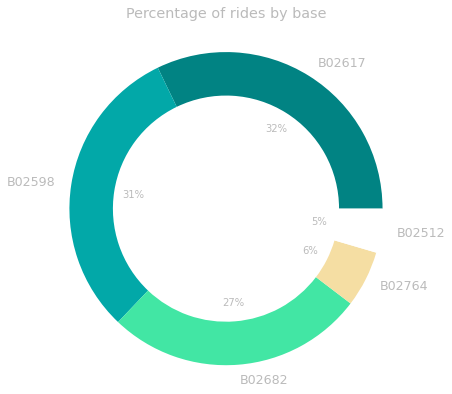

In [15]:
# frequency of bases
base_freq = data.Base.value_counts()

# ploting a pie chart to show the percentage of rides for each base
plt.pie(base_freq.values, labels=base_freq.index,
        radius=1.8,
        autopct='%.0f%%',
        wedgeprops=dict(width=0.5),
        colors=['#018383','#02a8a8','#42e6a4','#f5dea3','white'])
plt.title('Percentage of rides by base', y=1.35);

#### **Final thought**
So, this was a small analysis of uber pickups between April to September 2014. We found the answers of all the questions that we raised in the beginning. We got insights like - the frequency of pickups increased with time which shows the growth on uber rides, the busy hours of the day, most busy days in weeks and finally the impact of holiday on the number of rides.